## Importing Liabraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Data

In [3]:
data = pd.read_csv("data_for_lr.csv")

In [4]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [5]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### Data Preprocessing
## 
##### As we have x - 700 and y - 699 means we have 1 null value

In [7]:
data = data.dropna(axis = 0)

In [8]:
data.shape

(699, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


<font color = "red"> Now we have x and y both 699 and we are ready to go</font> 

## Splitting Data

In [10]:
#manual splitting

#reshaping to make them 2d array earlier it was (500,) seems 1D then making (500,1) 2d array
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)
test_input = np.array(data.x[500:]).reshape(199,1)
test_output = np.array(data.y[500:]).reshape(199,1)

In [11]:
#checking shape
print(train_input.shape)
print(train_output.shape)
print(test_input.shape)
print(test_output.shape)

(500, 1)
(500, 1)
(199, 1)
(199, 1)


# Linear Regression
# 
<font color = 'red'>
    sequence of steps :
    <ul>
        <li> Forward Propagation</li>
        <li> Cost Function </li>
        <li> Backward Propagation </li>
        <li> Updating parameters </li>

<font color = 'orange'>Repete cycle for achive optimal values of 'm' and 'c'

## Forward Propagation


<font color = 'green'><b> f(x) = m*x + c </font></b>
<br>
&nbsp;&nbsp;&nbsp;&nbsp; 
where,
<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
m , c = parameters

In [12]:
# here train_input is x values and parameters have 2 values (m,c)
def forward_propagation(train_input,parameters):
    m = parameters['m']
    c = parameters['c']
    
    predictions = np.multiply(m, train_input) + c
    
    return predictions
    # will return f(x)

## Cost Function

#### Cost or Mean Squared Error

we had,
<br>
&nbsp;&nbsp;&nbsp;&nbsp; <font color = 'green'> f(x) = m*x+c </font>
<br>
&nbsp;&nbsp;&nbsp;&nbsp;
<font color = 'green'><b> cost = 1/2n * (y - y')<sup>2</sup> </font></b>
<br>
which is,
<br>
&nbsp;&nbsp;&nbsp;&nbsp;
<font color = 'green'><b> cost = [(y - f(x))<sup>2</sup>] * 0.5 </font></b>
<br>
where,
<br> y = actual (train_output) , f(x) = predicted

In [13]:
def cost_function(train_output , predictions):
    
    cost = np.mean((train_output - predictions)**2) * 0.5
    
    return cost
    # will return the cost value

## Gradient Descent


<font color = 'green'> <b>Using Chain Rule<b></font>
    <ul>
    <li>Cost</li>
    <li>f = f(x)</li>
    </ul>
<br>
Partial Derivative of cost function wrt 'm' = <b> [dCost/dm = dCost/df * df/dm ] </b>
<br>
Partial Derivative of cost function wrt 'm' = <b> [dCost/dm = dCost/df * df/dm ] </b>

<font color = 'green'> <b>Partial derivatives<b></font>
    <ul>
    <li>dCost/df = (f - y)</li>
    <li>df/dm = x</li>
    <li>df/dc = 1 </li>
    </ul>
<br>
&nbsp;&nbsp; here , x = train_input , y = train_output , f = f(x) = y' = precitions

In [14]:
def backward_propagation(predictions,train_output,train_input):
    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    # here dm = df * x 
    # as we had got m'=m-(alpha) df*x
    # mean because division by 'n'
    dc = np.mean(df)
    # as dc = y'-y / n
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Updating Parameters


<font color = 'green'> <b> setting new parameters<b></font>
    <ul>
    <li>m = m - (learning_rate * dm)</li>
    <li>c = c - (learning_rate * dc)</li>
    </ul>

In [22]:
def update_parameters(parameters,learning_rate,derivatives):
    
    #updating 'm'
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    
    #updating 'c'
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    
    return parameters

## Training


<font color = 'green'> <b> now we need to loop these 4 steps in order to train ( get optimal value of 'm' and 'c')<b></font>

<Figure size 432x288 with 0 Axes>

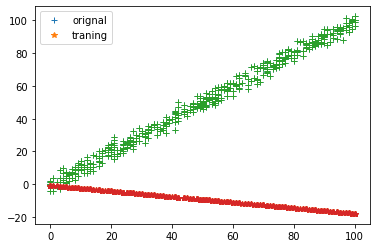

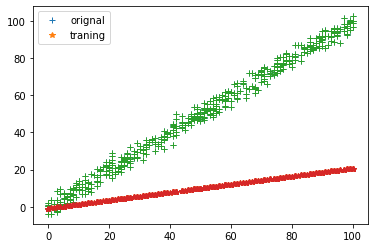

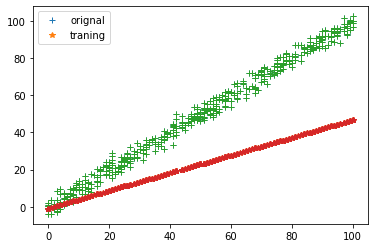

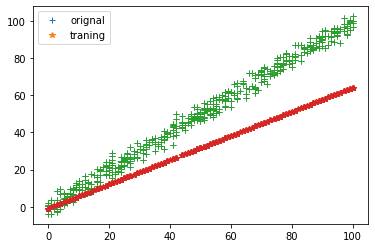

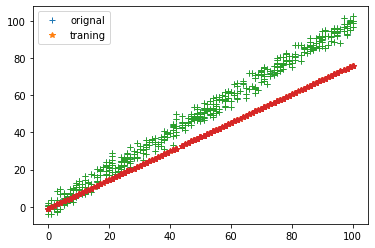

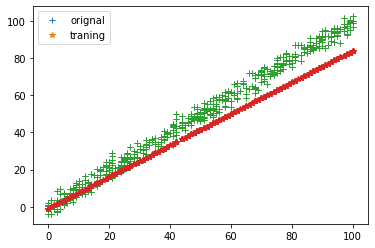

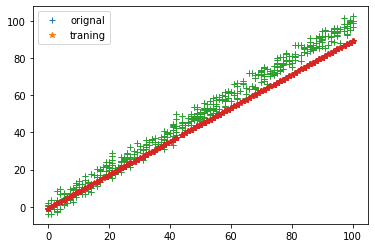

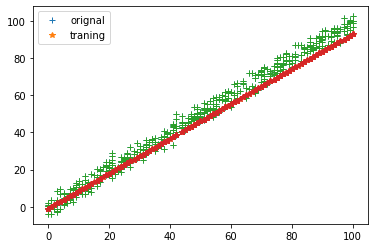

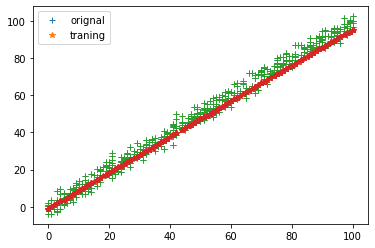

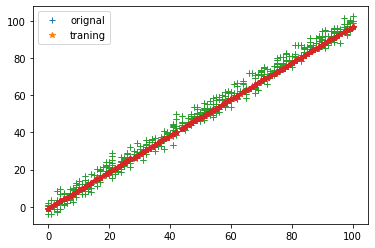

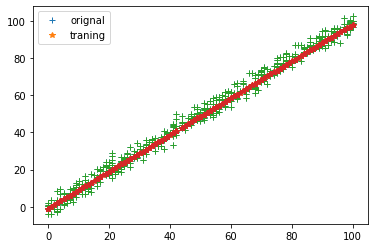

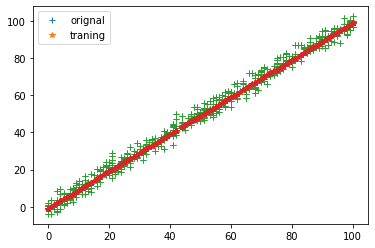

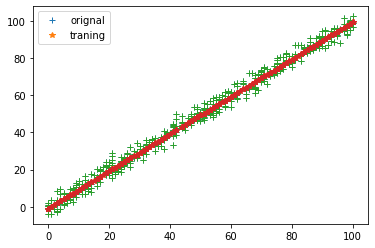

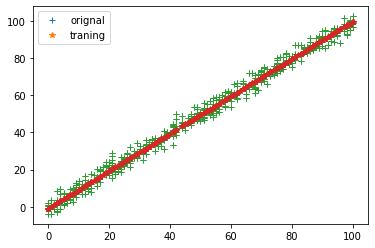

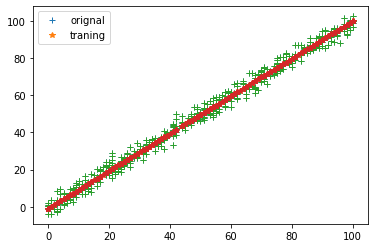

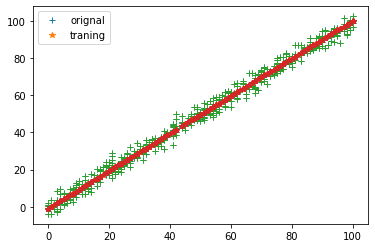

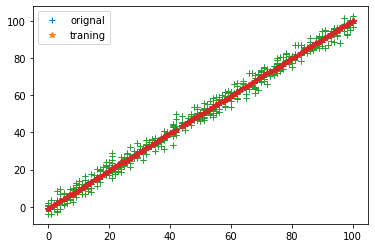

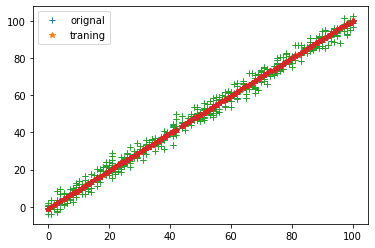

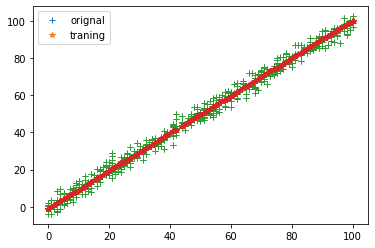

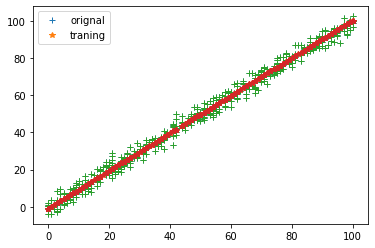

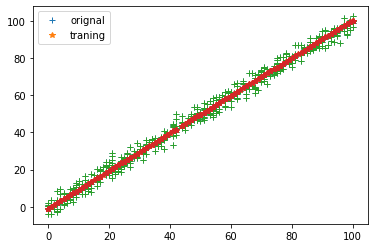

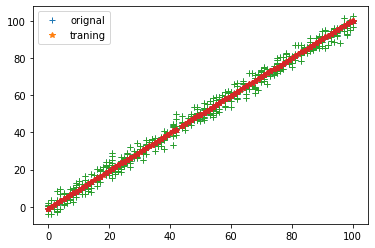

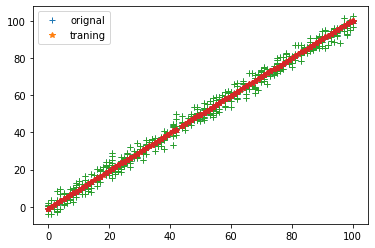

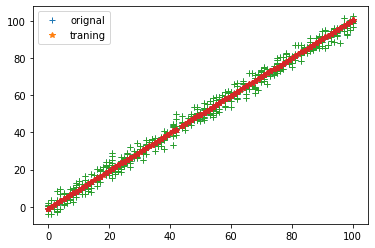

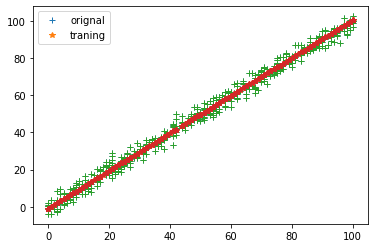

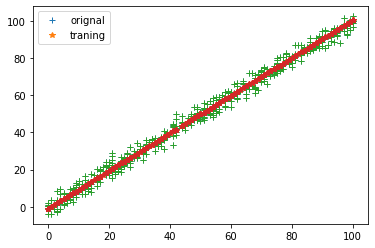

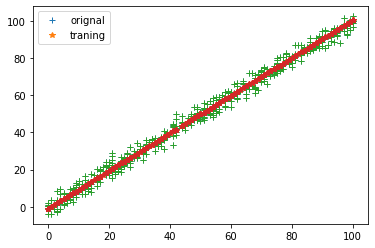

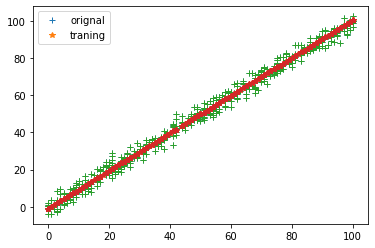

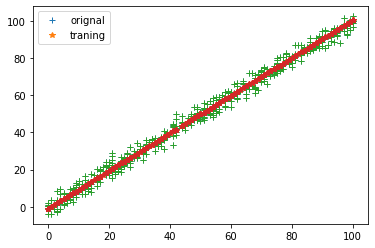

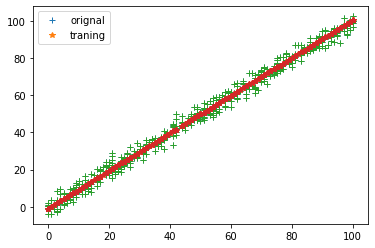

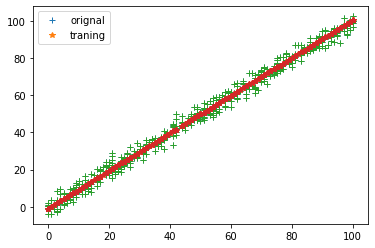

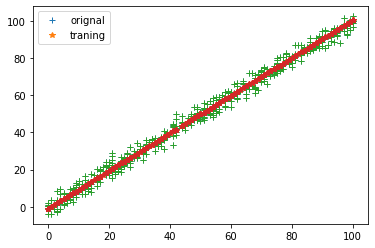

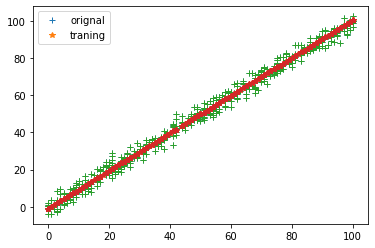

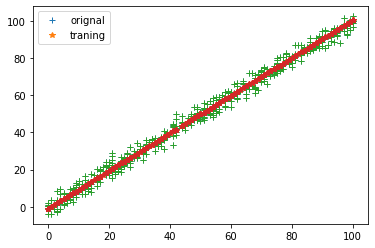

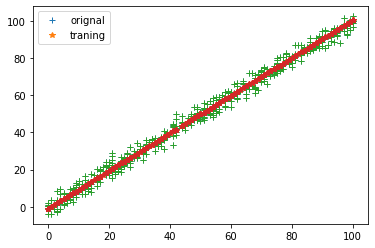

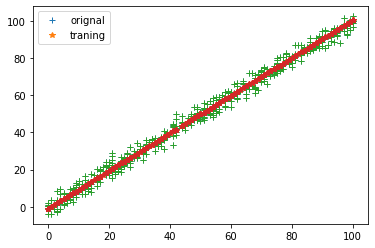

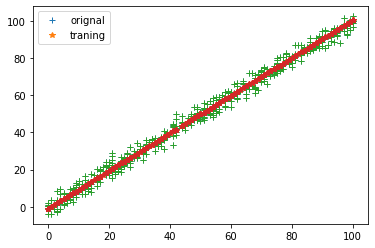

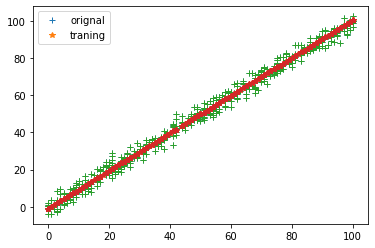

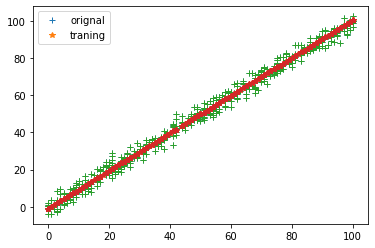

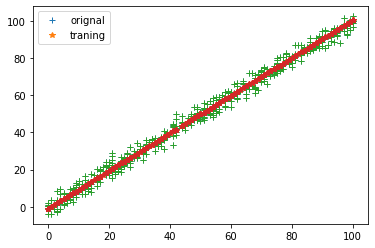

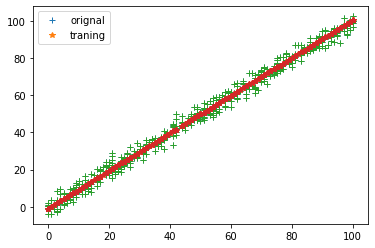

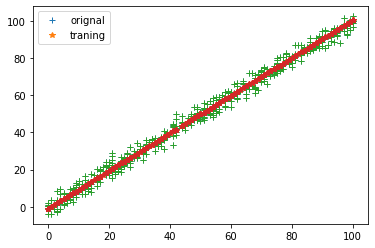

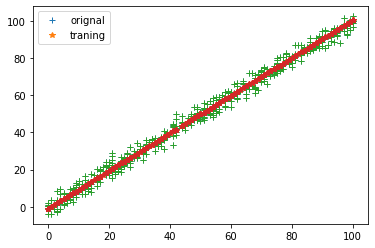

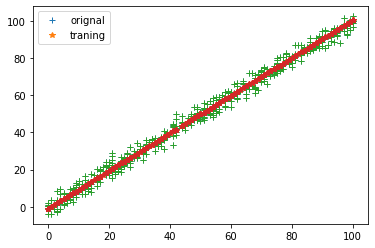

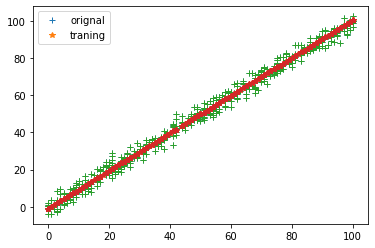

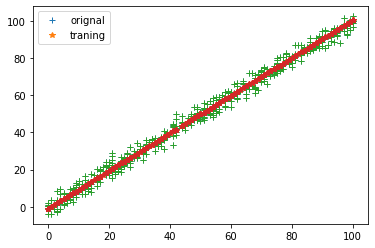

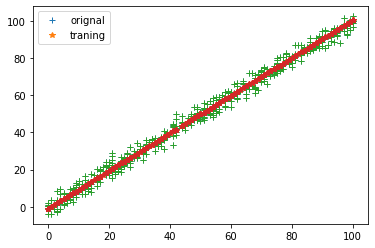

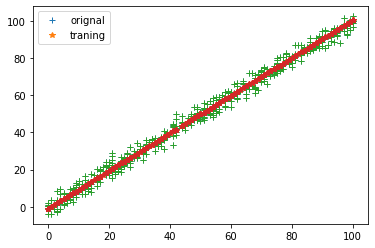

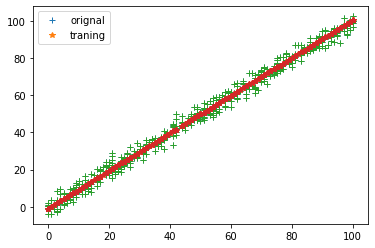

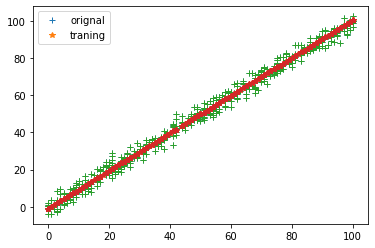

In [34]:
def train(train_input,train_output,learning_rate,iters):
    
    parameters = dict()
    
    # initalizing values for 'm' and 'c' keys
    parameters['m'] = np.random.uniform(0,1) * -1
    parameters['c'] = np.random.uniform(0,1) * -1
    
    # initalizing for ploting graph
    plt.figure()
    
    # initializing loss list
    loss = list()
    
    for i in range(iters):
        
        # getting predictions
        predictions = forward_propagation(train_input,parameters)
        
        # getting cost
        cost = cost_function(train_output,predictions)
        loss.append(cost)
        
        ## graph code starts 
        # graph ploting to see the cost function graph 
        fig, ax = plt.subplots()
        
        ax.plot(train_input,train_output,'+',label = 'orignal')
        ax.plot(train_input,predictions, '*',label = 'traning')
        
        legends = ax.legend()
        
        plt.plot(train_input,train_output,'+')
        plt.plot(train_input,predictions, '*')
        
        plt.show()
        
        ## graph code ends
        
        # getting derivatives
        derivatives = backward_propagation(predictions,train_output,train_input)
        
        # updating the parameters
        parameters = update_parameters(parameters,learning_rate,derivatives)
        
    return parameters,loss

#outside function

parameters,loss = train(train_input,train_output,0.0001,50)

In [35]:
parameters

{'m': 1.0115426859478411, 'c': -0.9323692312163956}

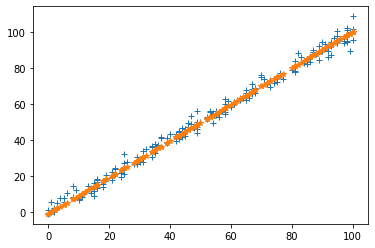

In [36]:
test_predictions = test_input * parameters['m'] + parameters['c']

plt.figure()

plt.plot(test_input, test_output, '+')
plt.plot(test_input, test_predictions, '*')

In [39]:
test_predictions

array([[ 4.12534420e+00],
       [ 6.07717346e+01],
       [ 4.66101370e+01],
       [ 9.81988140e+01],
       [ 2.94139113e+01],
       [ 6.27948200e+01],
       [-9.32369231e-01],
       [ 1.00221899e+02],
       [ 1.72753991e+01],
       [ 2.94139113e+01],
       [ 9.81988140e+01],
       [ 1.52523137e+01],
       [ 2.13215699e+01],
       [ 5.47024785e+01],
       [ 4.25639663e+01],
       [ 7.49333322e+01],
       [ 9.11180152e+01],
       [ 4.55985943e+01],
       [ 8.50487591e+01],
       [ 5.47024785e+01],
       [ 3.54831675e+01],
       [ 4.86332224e+01],
       [ 9.41526432e+01],
       [ 4.25639663e+01],
       [ 2.13215699e+01],
       [ 3.64947101e+01],
       [ 2.33446552e+01],
       [ 9.51641859e+01],
       [ 6.07717346e+01],
       [ 7.49333322e+01],
       [ 6.78525334e+01],
       [ 5.77371066e+01],
       [ 4.12534420e+00],
       [ 5.26793931e+01],
       [ 7.99910456e+01],
       [ 8.30256737e+01],
       [ 2.43561979e+01],
       [ 3.34600821e+01],
       [ 2.5

In [38]:
cost_function(test_predictions, test_output)

4.152064111133881